In [157]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots which we will create!

# Read the Data

df=pd.read_csv(r'C:\Users\tariq\Downloads\Python_Corelation_Project\movies.csv')


In [180]:
# Look at the Data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [19]:
# lets see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [23]:
# Data types in our file

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [34]:
#converting data types from 'float64 to Int64'

df['budget']= df['budget'].astype('Int64')

df['gross ']= df['gross'].astype('Int64')

df['votes']= df['votes'].astype('Int64')

df['runtime']= df['runtime'].astype('Int64')

In [160]:
df= df.sort_values(by= ['gross'], inplace= False, ascending= False)



In [119]:
 pd.set_option('display.max_rows', None)

In [184]:
 # Drop any duplicate
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [121]:
#fill columns with 0 if they have NAN values

df.fillna(0, inplace=True)


In [113]:
# budget high corelation
#Company high corelation

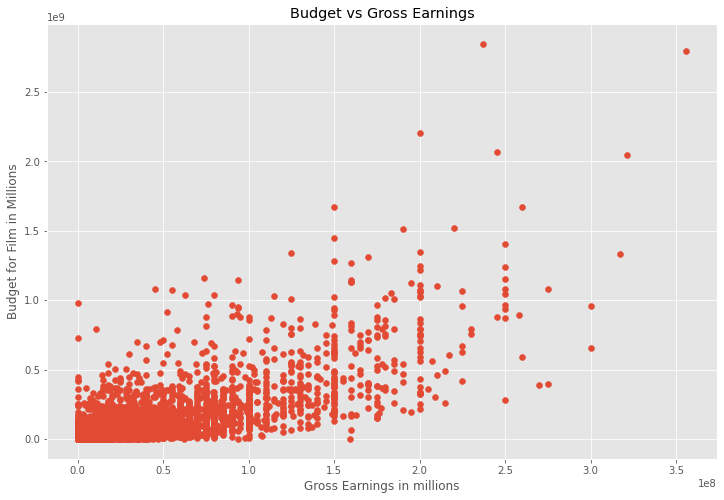

In [127]:
#Scatter plot with Budget and Gross (columns)

plt.scatter(x= df['budget'], y= df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings in millions')
plt.ylabel('Budget for Film in Millions')
plt.show()


In [136]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         Int64
director     object
writer       object
star         object
country      object
budget        Int64
gross       float64
company      object
runtime       Int64
gross         Int64
dtype: object

In [139]:
df['budget'] = df['budget'].astype(float)


In [140]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         Int64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime       Int64
gross         Int64
dtype: object

<AxesSubplot:xlabel='budget', ylabel='gross'>

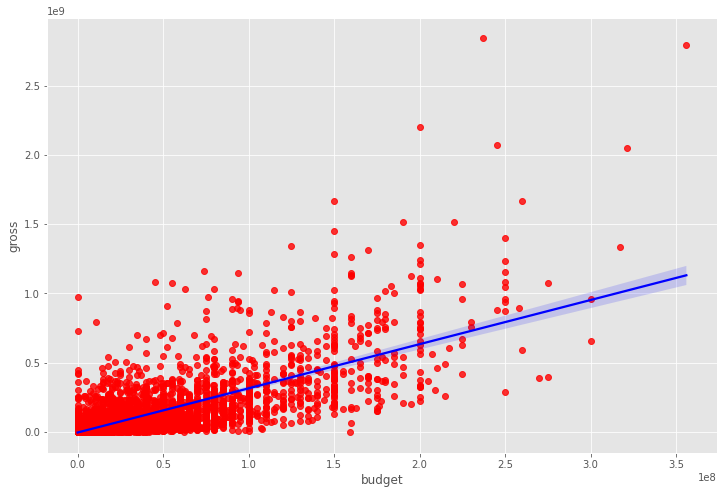

In [142]:
# Regression plot (budget vs gross earning plot using seaborn)

sns.regplot(x='budget', y='gross', data = df, scatter_kws = {'color' : 'red'}, line_kws= {'color':'blue'})

In [147]:
# lets start looking at co-relation
df.corr(method= 'pearson') #pearson, Kendall, Spearman

,year,score,votes,budget,gross,runtime,gross
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.261900
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.186012
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.632870
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.750157
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,1.000000
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.244339
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,1.000000


In [148]:
#High Corelation between budget and gross
#I was right

In [150]:
corelation_matrix=df.corr(method= 'pearson')

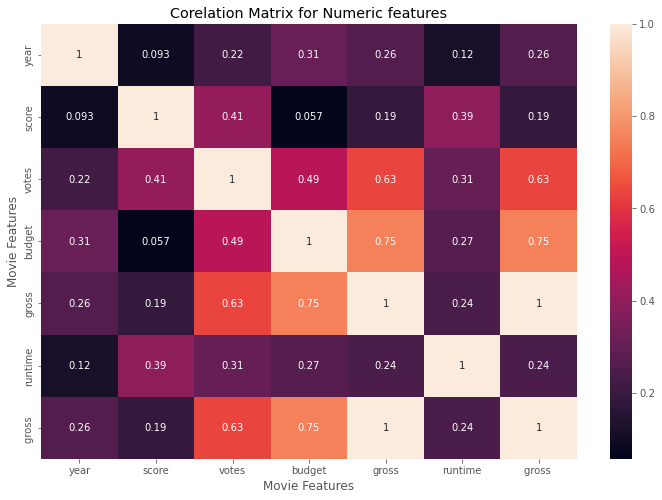

In [153]:
sns.heatmap(corelation_matrix, annot=True)
plt.title('Corelation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [154]:
# Look at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162,2847246203
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181,2797501328
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194,2201647264
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138,2069521700
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149,2048359754


In [183]:
df_numerized= df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [182]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


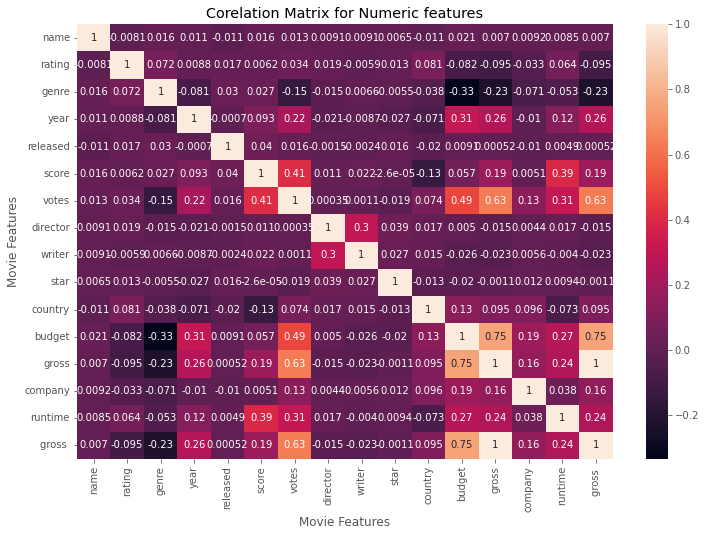

In [163]:
corelation_matrix=df_numerized.corr(method= 'pearson')
sns.heatmap(corelation_matrix, annot=True)
plt.title('Corelation Matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [165]:
correlation_mat = df_numerized.corr()


In [166]:
corr_pairs = correlation_mat.unstack()

In [185]:
corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [170]:
sorted_pairs = corr_pairs.sort_values()

In [186]:
sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
gross   genre    -0.234297
dtype: float64

In [173]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

In [174]:
high_corr

votes     gross       0.632870
gross     votes       0.632870
gross     votes       0.632870
votes     gross       0.632870
gross     budget      0.750157
budget    gross       0.750157
          gross       0.750157
gross     budget      0.750157
          gross       1.000000
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
          gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
gross     gross       1.000000
dtype: float64

In [179]:
# Thus Votes and budget has high corr to gross earnings

# Thus Company has low co-relation (I was wrong)

 